Deep Declarative Networks - Image segmentation testing
---
For local (cpuonly) torch install create a conda environment with
> conda install pytorch torchvision torchaudio cpuonly -c pytorch

> pip install -r requirements.txt

> jupyter nbextension enable --py widgetsnbextension


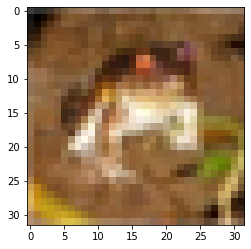

In [36]:
# Obtain PASCALVOC 2007 segmentation dataset from pytorch
# switch False to True if not already downloaded
%matplotlib inline
# or notebook for interactive?
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch

voc = torchvision.datasets.VOCSegmentation(root='./data/voc07/', year='2007', image_set='train', download=False)

cifar10 = torchvision.datasets.CIFAR10(root='./data/cifar10/', train=True, download= False)
image,target = cifar10[0]
plt.imshow(image)

In [41]:
import skimage

# This is a simple dissimilarity graph creation, using absolute intensity differences
# calculated using YUV colour space (thanks scikit-image package for doing everything)
def create_graph(image):
    # create the pixel graph with edge weights as dissimilarities
    yuv = skimage.color.rgb2yiq(image)
    (w, h) = yuv.shape[:2]
    edges_img = np.zeros((h, w))
    for i in range(yuv.shape[0]):
        for j in range(yuv.shape[1]):
            # compute edge weight for nbd pixel nodes for the node i,j
            for i1 in range(i-1, i+2):
                for j1 in range(j-1, j+2):
                    if i1 == i and j1 == j: continue
                    if i1 >= 0 and j1 >= 0 and i1 < h and j1 < w:
                        wt = np.abs(yuv[i,j,0]-yuv[i1,j1,0]) # how dissimilar they are
                        edges_img[i1,j1] = wt
    return edges_img

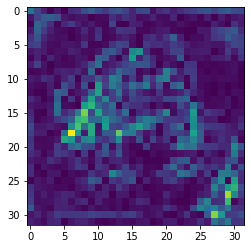

In [42]:
plt.clf()
w = create_graph(image)
plt.imshow(w)

In [ ]:
# Now we can do normalised cutting from [Shi & Malik (2000)] https://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf



In [ ]:
# OLD STUFF FROM in[1]
# voc = torchvision.datasets.VOCSegmentation(root='./data/voc07/', year='2007', image_set='train', download=False)
# # voc = torchvision.datasets.VOCDetection(root='./data/voc07detect/', year='2007', image_set='train', download=False)
# # each index is a tuple of (image, segmentation)

# img = voc[0][0]
# plt.imshow(img)

# img.getpixel((0,0))[0]

# CITYSCAPES DATASET (these images are big...)
# cityscapes = torchvision.datasets.Cityscapes(root='./data/cityscapes/', split='train', mode='fine',
#                      target_type='semantic')

# img, smnt = cityscapes[0]
# plt.figure()
# plt.imshow(img)
# plt.figure()
# plt.imshow(smnt)